## Part 1

### Title
#### Section 1: Different fonts
regular.
**Bold.**
*Italic.*
#### Section 2: Enumeration
- First Bullet
- Second Bullet
    - A
    - B
- Third Bullet
    - Sub-bullet
    - Sub-bullet
#### Section 3: Code
This is inline code: `x*x for x in x`, and this is a block of code (note the   
syntax highlighting!):  
```python
#comment
    def foo(x,y,z):
        return x + 10 * y + 100 * Z
```

## Part 2

In [303]:
#Start-up
import numpy as np
import pandas as pd
data = pd.read_csv('student-mat.csv', sep=";")
print(data)
data.dtypes #checking data types to see what needs to be converted into numeric values

    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
390     MS   M   20       U     LE3       A     2     2  services  services   
391     MS   M   17       U     LE3       T     3     1  services  services   
392     MS   M   21       R     GT3       T     1     1     other     other   
393     MS   M   18       R     LE3       T     3     2  services     other   
394     MS   M   19       U     LE3       T     1     1     other   at_home   

     ... famrel freetime  goout  Dalc  Walc health 

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [304]:
#data cleaning and validation 
missing = pd.isnull(data).sum() 
missing #make sure there are no missing
data["school"] = data["school"].apply(lambda x : 0 if x == "GP" else 1)
data["sex"] = data["sex"].apply(lambda x : 0 if x == "F" else 1)
data["activities"] = data["activities"].apply(lambda x : 0 if x == "no" else 1) 
#After deciding what features to use, convert the non-numeric objects into 0 or 1
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,0,0,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,0,0,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,0,0,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,0,0,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,1,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,1,1,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,1,1,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,1,1,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [305]:
#data partinioning, selection, and training
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
features = data[["school",'sex','age','Medu','Fedu','traveltime','studytime','activities',
                        'famrel','goout','health','absences']] #created a dataframe with all the features I will use
num_col = data.shape[1] 
y = data.iloc[:, num_col-1] #create the target
result = np.zeros((16,3)) #create a 2D numpy array to store the output for later visualization
count = 0
for leafnodes in [5,10,15,20]: 
    for num_features in [3,6,9,12]: #use a nested for loop to iterate over the different leafnodes and feature numbers
        X = features.iloc[:, :num_features] #create the X based on number of features (3,6,9,12)
        X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 35)  #partition data into train and test
        thetree = DecisionTreeRegressor(max_leaf_nodes = leafnodes, random_state = 35)
        thetree = thetree.fit(X_train, y_train)
        prediction = thetree.predict(X_test) #train the tree and make predictions
        msr = mean_squared_error(y_test, prediction) #get the mean sqaured error
        result[count][0],result[count][1],result[count][2] = leafnodes, num_features, msr
        #store the value in the 2D array, while the first column is leafnodes size, second column is the feature \
        #numbers, and the third column is the mean sqaured error
        count += 1
print(result)

[[ 5.          3.         21.29063645]
 [ 5.          6.         24.93557995]
 [ 5.          9.         24.93557995]
 [ 5.         12.         26.3829272 ]
 [10.          3.         21.86781534]
 [10.          6.         25.08112971]
 [10.          9.         25.42992836]
 [10.         12.         29.45185336]
 [15.          3.         23.26405228]
 [15.          6.         26.98108341]
 [15.          9.         26.10955364]
 [15.         12.         29.40074448]
 [20.          3.         23.13352962]
 [20.          6.         28.0649803 ]
 [20.          9.         25.94608374]
 [20.         12.         29.81374274]]


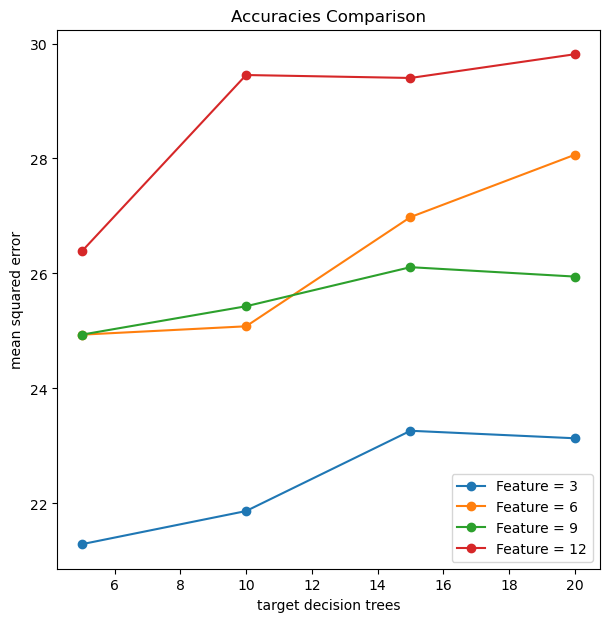

In [306]:
#visualization 
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1,figsize=(7,7))
ax.plot([5,10,15,20], [result[:,2][0], result[:,2][4], result[:,2][8], result[:,2][12]],
        marker = 'o',label='Feature = 3')
ax.plot([5,10,15,20], [result[:,2][1], result[:,2][5], result[:,2][9], result[:,2][13]],
        marker = 'o',label='Feature = 6')
ax.plot([5,10,15,20], [result[:,2][2], result[:,2][6], result[:,2][10], result[:,2][14]],
        marker = 'o', label='Feature = 9')
ax.plot([5,10,15,20], [result[:,2][3], result[:,2][7], result[:,2][11], result[:,2][15]],
        marker = 'o', label='Feature = 12')
#plot four lines, each represent a certain number of features so we can compare both the relationship between \
# feature numbers and MSR, and between node seperately, and also together
ax.set_xlabel('target decision trees')
ax.set_ylabel('mean squared error')
ax.set_title("Accuracies Comparison")
ax.legend()

## summary


The general result I found is that there is some correlation between both feature numbers and MSR(accuracy of the tree), and node numbers and MSR. As feature number goes up, MSR goes up, which means the accuracy of the tree decreases. Similarly, as node number goes up, MSR goes up slightly, but not as obvious as feature numbers' influence on accuracy. I was a little suprised by this result, as I anticipated that accuracy will increase as nodes and features numbers goes up because it provides more data to learn from and deeper mechanism. I think the reason for this result is probably features quality. Some of the features can be less useful than others and even confounding, which leads to inaccurate prediction. It's important to pick really effective features that has more to do with the target we are looking at. 

Another thing I want to mention is that, originally, I didn't put the set the random_state when I'm partitioning and training the data. The result changes everytime I run the code again, and didn't show clear correlation between the variables. After setting up the random_state, the code shows consistent results and trends now.